In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Loading data

In [2]:
df=pd.read_csv('Ecommerce Customers')

In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory data analysis of Data

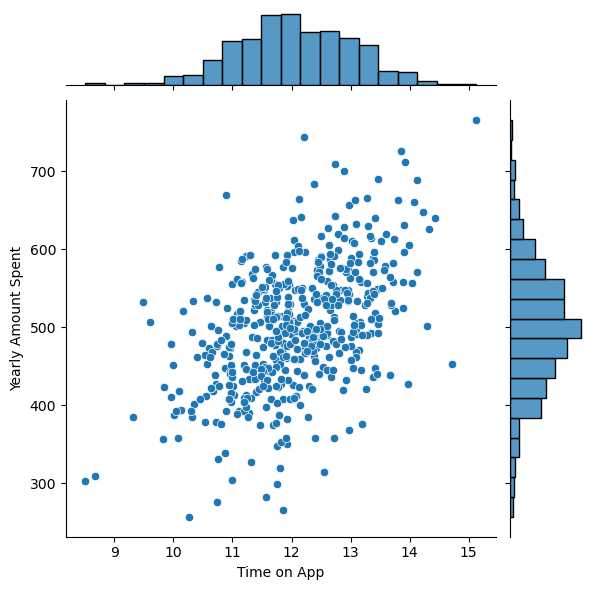

In [4]:
# Shows relationship between variables
sn.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

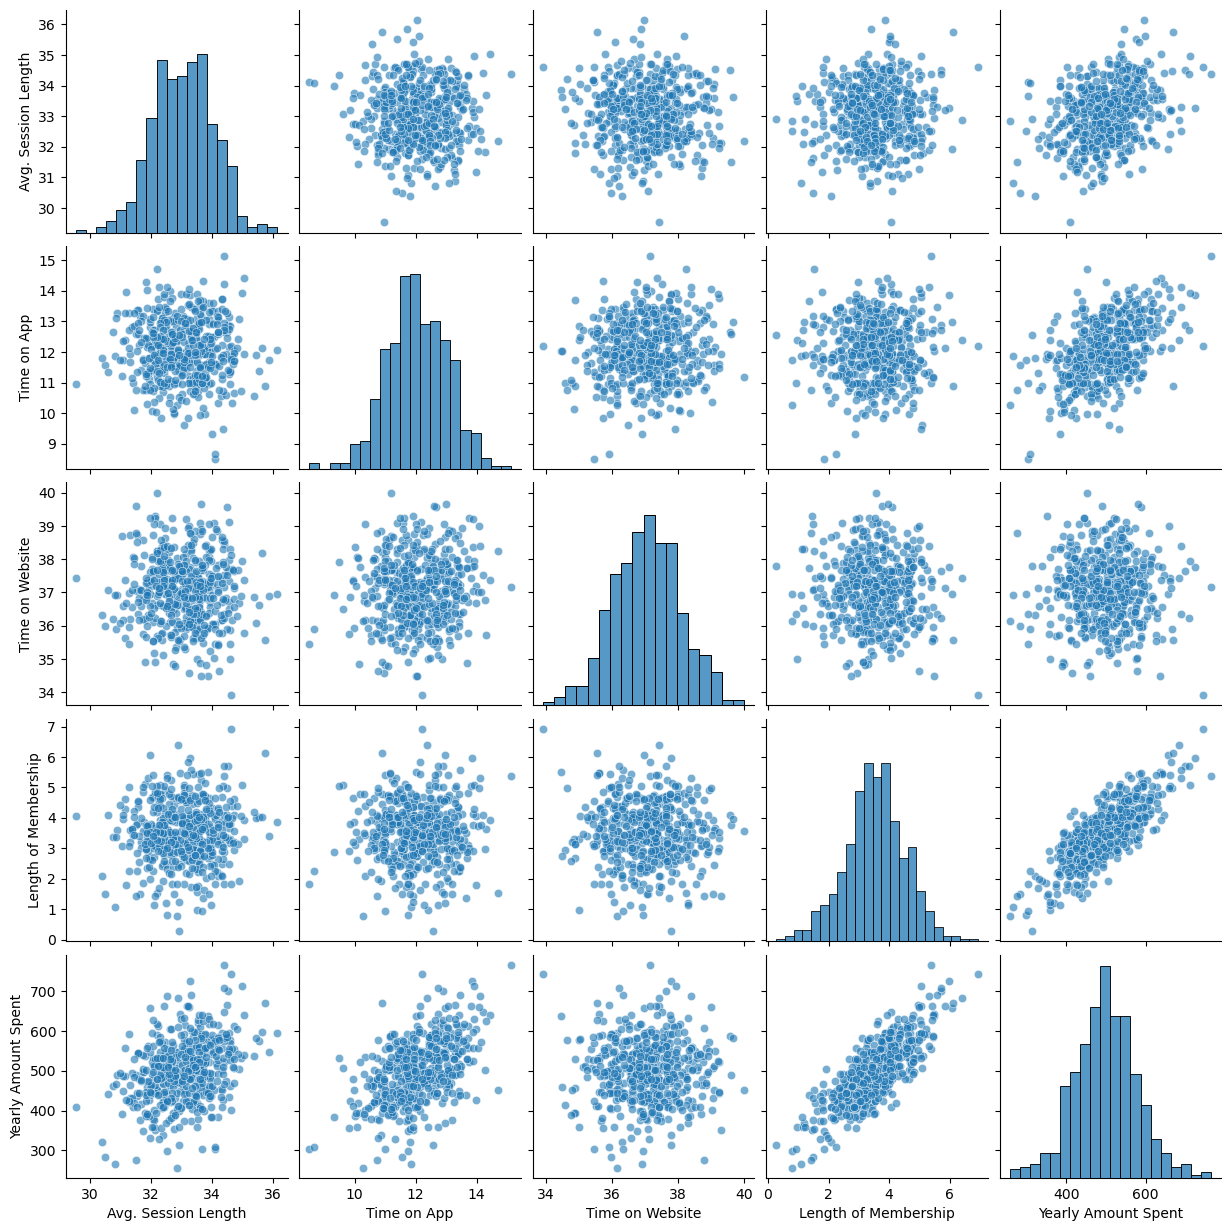

In [5]:
#shows relationship of all numerical variable with each other
sn.pairplot(df,kind='scatter',plot_kws={'alpha':0.6})

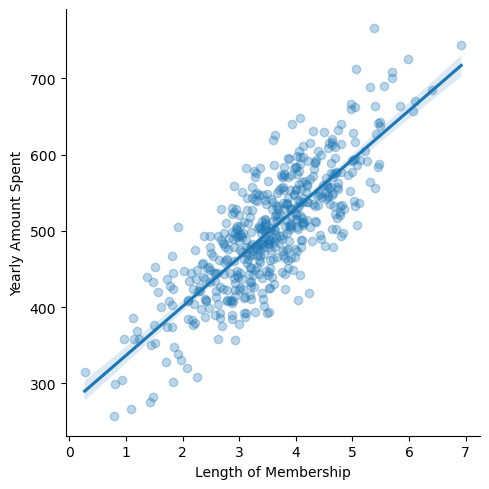

In [6]:
'''
linear model plot of "Length of Membership"(variable having most effect on y) vs 
"Yearly Amount Spent" which will be taken as target value for our linear regression model
'''
sn.lmplot(x='Length of Membership',
          y='Yearly Amount Spent',
          data=df,scatter_kws={'alpha':0.3})

In [7]:
#some info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Actual Model

#### specifying values for our model

In [8]:
# sklearn is the library used to get our model
from sklearn.model_selection import train_test_split

In [9]:
'''
out X i.e variables will be all the numerical values in th dataframe expect our target value, 
y our target value will be "Yearly amount spent"
'''
X=df.select_dtypes(include='float').drop('Yearly Amount Spent',axis=1)
y=df['Yearly Amount Spent']


In [10]:
#spliting our data into 70% test set and 30% train set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

#### Feature scaling

In [11]:
#Performing feature scaling to scale our data for faster computation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Training the moodel using LinearRegression from Sklearn

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [14]:
# Getting value of coefficients i.e impact of each variable on y
coef_values=pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
coef_values

,Coef
Avg. Session Length,25.122418
Time on App,37.518770
Time on Website,0.291706
Length of Membership,60.614684


In [15]:
#Taking predictions from model
predictions=lm.predict(X_test)

In [16]:
X_features=['Avg. Session Length','Time on App','Time on Website','Length of Membership']
X_test_array=np.array(X_test)
y_test_array=np.array(y_test)


## Model Evaluation in print

#### Checking cost

In [17]:
#Checking models min cost 
w=lm.coef_
b=lm.intercept_ 
def compute_cost(x,y,w,b):
    cost=0.0
    m=x.shape[0]
    for i in range (m):
        fwb=np.dot(x[i],w)+b
        cost+=(fwb-y[i])**2
    
    cost=cost/(2*m)

    return cost

cost=compute_cost(X_test_array,y_test_array,w,b)
cost

40.450311848799714

#### Cost vs precited value 


In [18]:
#Checking actual vs predicted value of model
n=predictions.shape[0]
for i in range (4):
    print(f'Model prediction: {predictions[i]}, Actual value: {y_test_array[i]}')

Model prediction: 498.81705535564913, Actual value: 494.6871558102853
Model prediction: 519.534037294989, Actual value: 501.1224915036564
Model prediction: 562.9488671808076, Actual value: 563.6728733601082
Model prediction: 478.9050134579484, Actual value: 469.3108614953106


#### Error terms

In [19]:
# some values to check model accuracy
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
print(f'Mean absolute error: {mean_absolute_error(y_test,predictions)}')
print(f'Mean squared error: {mean_squared_error(y_test,predictions)}')
print(f'Root mean squared error: {math.sqrt(mean_squared_error(y_test,predictions))}')

Mean absolute error: 7.099124594093849
Mean squared error: 80.90062369759943
Root mean squared error: 8.994477399915986


## Evaluation using plots

Text(0.5, 1.0, 'Evaluation of model')

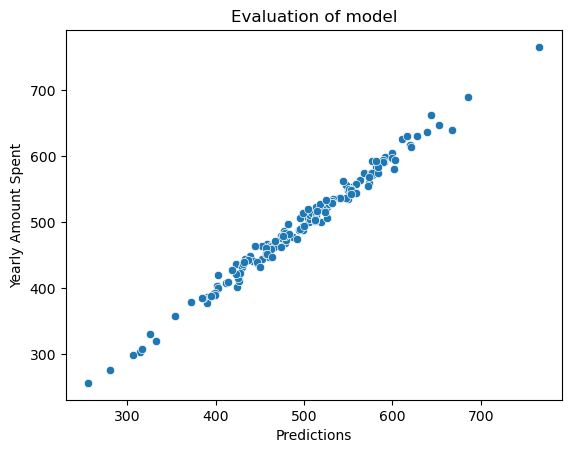

In [20]:
#plot showing actual vs predicted value
sn.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predictions')
plt.title('Evaluation of model')

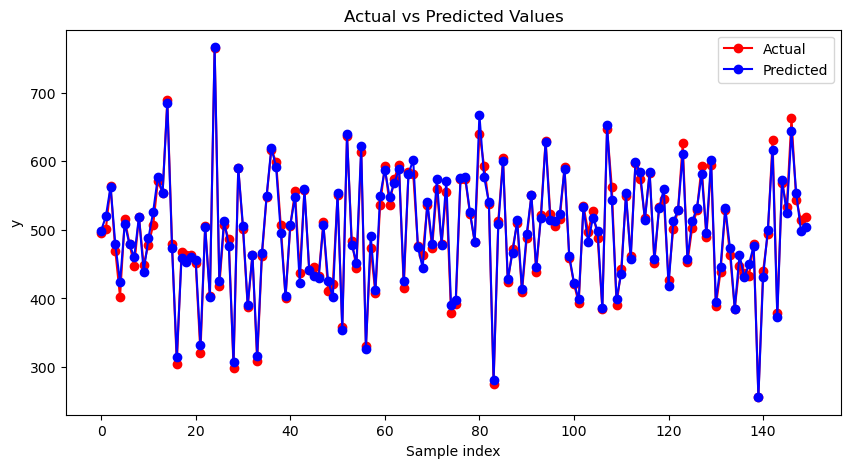

In [21]:
#plot showing diffrence b/w actual and predicted values inside plot
plt.figure(figsize=(10,5))
plt.plot(y_test_array, "ro-", label="Actual")
plt.plot(predictions, "bo-", label="Predicted")
plt.xlabel("Sample index")
plt.ylabel("y")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

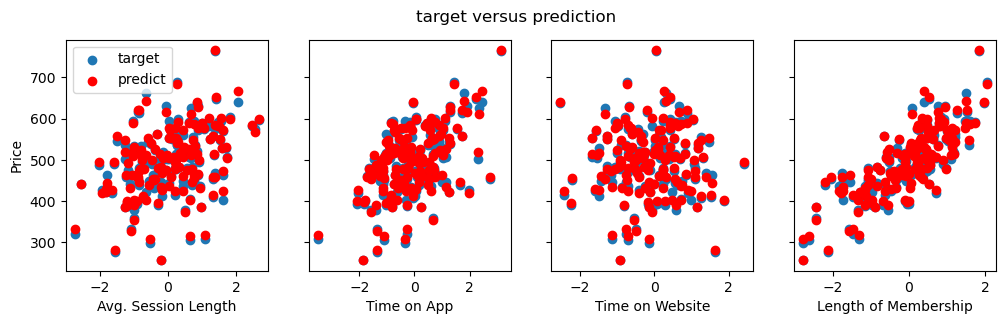

In [22]:
# plot predictions vs targets using original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test_array[:,i],y_test, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_test_array[:,i],predictions,color='r', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction")
plt.show()

#### Residuals

In [23]:
#residuals represent diffrence between actual value and predictd value
residuals=y_test_array-predictions
residuals[0:4]

array([ -4.12989955, -18.41154579,   0.72400618,  -9.59415196])

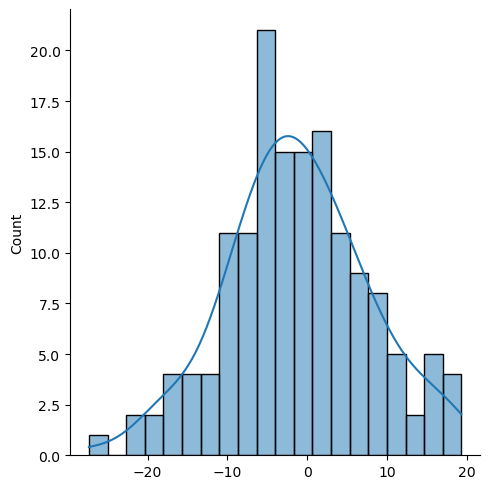

In [24]:
#confirming residuals are random
sn.displot(residuals,bins=20,kde=True)

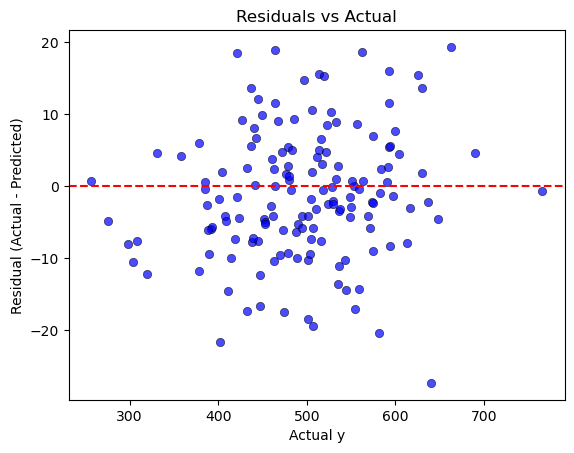

In [25]:
#Plot comparing residuals on plot
sn.scatterplot(x=y_test_array, y=residuals, color="blue", alpha=0.7, edgecolor="k")
plt.axhline(0, color="red", linestyle="--")  # reference line
plt.xlabel("Actual y")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Actual")
plt.show()

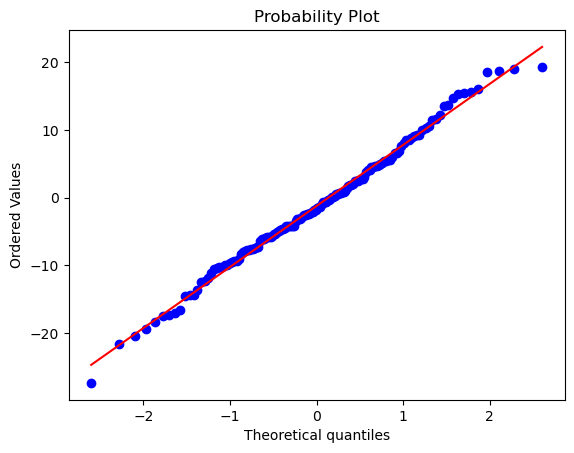

In [26]:
import pylab
import scipy.stats as stats

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()